<a href="https://colab.research.google.com/github/silvaelaine/vistos-eua-ML-olympiad/blob/main/ML_Olympiad_Vistos_EUA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Olympiad for Students - TopVistos EUA
Preveja a aprovação de vistos de trabalho dos EUA na nossa competição de Machine Learning.


### **Metodologia CRISP - DM**


O projeto utilizou-se da metodologia CRISP-DM (Cross Industry Process Model for Data Mining) adaptada para projetos em Data Science - DS (Análise Exploratória de Dados, Machine Learning, Deep Learning, dentre outras aplicações). A referida metodologia baseia-se em 06 (seis) etapas, a saber: Entendimento do Negócio, Entendimento dos Dados, Preparação dos Dados, Construção dos Modelos, Avaliação e Implementação.

<img alt="crisp-dm" width="50%" src="https://miro.medium.com/v2/resize:fit:1400/1*z0U0taZoignUB7aQ4ZsOtg.png">

### **A. Entendendo o Negócio:**

Nesta etapa serão estudados os objetivos do negócio, avaliada a situação negócio (quais problemas a serem resolvidos?), bem como determinado as metas e ou objetivos para o projeto de Data Science (quais objetivos e métricas a serem usadas)

**A1. Objetivos do Negócio.**


As comunidades empresariais nos Estados Unidos enfrentam uma alta demanda por recursos humanos, mas um dos desafios constantes é identificar e atrair o talento certo, que é talvez o elemento mais importante para se manter competitivo. Empresas nos Estados Unidos procuram indivíduos trabalhadores, talentosos e qualificados tanto localmente quanto no exterior.

A Lei de Imigração e Nacionalidade (INA) dos EUA permite que trabalhadores estrangeiros venham trabalhar nos Estados Unidos temporária ou permanentemente. A lei também protege os trabalhadores americanos contra impactos adversos em seus salários ou condições de trabalho, garantindo que os empregadores americanos cumpram os requisitos legais ao contratar trabalhadores estrangeiros para suprir a escassez de mão de obra. Os programas de imigração são administrados pelo Escritório de Certificação de Trabalho Estrangeiro (OFLC).

O OFLC processa pedidos de certificação de emprego para empregadores que buscam trazer trabalhadores estrangeiros para os Estados Unidos e concede certificações nos casos em que os empregadores podem demonstrar que não há trabalhadores americanos suficientes disponíveis para realizar o trabalho com salários que atendam ou excedam o salário pago para a ocupação na área de emprego pretendida.

**A2. Quais os problemas a serem resolvidos?**


No ano fiscal de 2016, o OFLC processou 775.979 pedidos de empregadores para 1.699.957 posições de certificações de trabalho temporárias e permanentes. Isso representou um aumento de nove por cento no número total de pedidos processados em relação ao ano anterior. O processo de revisar cada caso está se tornando uma tarefa tediosa à medida que o número de candidatos aumenta a cada ano.

O aumento do número de candidatos a cada ano demanda uma solução baseada em Aprendizado de Máquina que possa ajudar na pré-seleção dos candidatos com maiores chances de aprovação de VISTO. O OFLC contratou sua empresa, TopVistos, para soluções baseadas em dados. Como Cientista de Dados, você deve analisar os dados fornecidos e, com a ajuda de um modelo de classificação:

* Facilitar o processo de aprovação de vistos.

* Recomendar um perfil adequado para os candidatos para os quais o visto deve ser certificado ou negado, com base nos fatores que influenciam significativamente o status do caso.

**A3. Quais as métricas para aferição do sucesso do projeto?**

A métrica de avaliação para esta competição é a Média do F1-Score. O F1-Score, comumente usado em problemas de classificação, mede a taxa de acertos utilizando as estatísticas de Precisão (p) e Recall (r).


### **B. Entendendo os Dados:**

Nesta etapa estaremos coletando os dados iniciais, descrevendo os referidos, bem como explorando os dados com as estatísticas descritivas e por fim, verificando a qualidade de dados.

##### **B1.Coletando os dados iniciais**

In [34]:
# Carregando bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

import time

%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,EZYV10567,Europa,Ensino Médio,N,S,2087,1855,Sul,69711.24,Ano,S,Negado
1,EZYV5505,Ásia,Mestrado,S,N,5991,2003,Meio-Oeste,52931.38,Ano,S,Aprovado
2,EZYV5207,Ásia,Ensino Médio,N,N,1426,2000,Ilha,110830.21,Ano,S,Negado
3,EZYV7545,Ásia,Ensino Médio,N,N,3846,1992,Meio-Oeste,91884.68,Semana,S,Negado
4,EZYV16071,Ásia,Ensino Superior,S,N,3957,1949,Nordeste,138155.24,Ano,S,Aprovado


In [5]:
test_df.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral
0,EZYV22339,Ásia,Ensino Superior,S,N,2414,1973,Nordeste,103320.80,Ano,N
1,EZYV9333,Ásia,Mestrado,N,S,2928,1937,Oeste,49786.35,Ano,S
2,EZYV9740,Ásia,Ensino Superior,S,N,1836,1999,Oeste,60855.83,Ano,S
3,EZYV3328,Ásia,Ensino Superior,S,N,122,2004,Sul,82379.06,Semana,S
4,EZYV12321,América do Sul,Ensino Superior,S,S,1720,2003,Nordeste,6719.81,Ano,S


In [6]:
train_df.isnull().sum()

id_do_caso                        0
continente                        0
educacao_do_empregado             0
tem_experiencia_de_trabalho       0
requer_treinamento_de_trabalho    0
num_de_empregados                 0
ano_de_estabelecimento            0
regiao_de_emprego                 0
salario_prevalecente              0
unidade_de_salario                0
posicao_em_tempo_integral         0
status_do_caso                    0
dtype: int64

In [7]:
test_df.isnull().sum()

id_do_caso                        0
continente                        0
educacao_do_empregado             0
tem_experiencia_de_trabalho       0
requer_treinamento_de_trabalho    0
num_de_empregados                 0
ano_de_estabelecimento            0
regiao_de_emprego                 0
salario_prevalecente              0
unidade_de_salario                0
posicao_em_tempo_integral         0
dtype: int64

In [8]:
# train_df
print(f"O dataframe de treino possuiu {train_df.shape[0]} linhas e {train_df.shape[1]} colunas")

# test_df
print(f"O dataframe de teste possuiu {test_df.shape[0]} linhas e {test_df.shape[1]} colunas")

O dataframe de treino possuiu 17836 linhas e 12 colunas
O dataframe de teste possuiu 7644 linhas e 11 colunas


In [9]:
#Colunas categóricas
train_df.select_dtypes(include=['object']).columns

Index(['id_do_caso', 'continente', 'educacao_do_empregado',
       'tem_experiencia_de_trabalho', 'requer_treinamento_de_trabalho',
       'regiao_de_emprego', 'unidade_de_salario', 'posicao_em_tempo_integral',
       'status_do_caso'],
      dtype='object')

In [10]:
#Colunas categóricas
train_df.select_dtypes(exclude=['object']).columns

Index(['num_de_empregados', 'ano_de_estabelecimento', 'salario_prevalecente'], dtype='object')

In [11]:
def gerar_metadados(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata


metadados = gerar_metadados(train_df)
metadados

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,num_de_empregados,int64,0,0.0,6294
1,ano_de_estabelecimento,int64,0,0.0,199
2,salario_prevalecente,float64,0,0.0,17827
3,id_do_caso,object,0,0.0,17836
4,continente,object,0,0.0,6
5,educacao_do_empregado,object,0,0.0,4
6,tem_experiencia_de_trabalho,object,0,0.0,2
7,requer_treinamento_de_trabalho,object,0,0.0,2
8,regiao_de_emprego,object,0,0.0,5
9,unidade_de_salario,object,0,0.0,4


### **C. Preparando os Dados:**

Pré-processamento & Feature Engineering: Transformando dados categóricos

* Label encoder

unidade_de_salario, regiao_de_emprego, continente

* Ordinal Encoder

educacao_do_empregado

* Binary Encoder

tem_experiencia_de_trabalho
requer_treinamento_de_trabalho
posicao_em_tempo_integral
status_do_caso

**Label encoder**

In [12]:
# criando instância TREINO
le = LabelEncoder()

cols = ['unidade_de_salario', 'regiao_de_emprego', 'continente']

# transformando as colunas de uma vez
train_df[cols] = train_df[cols].apply(LabelEncoder().fit_transform)

train_df.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,EZYV10567,2,Ensino Médio,N,S,2087,1855,4,69711.24,0,S,Negado
1,EZYV5505,5,Mestrado,S,N,5991,2003,1,52931.38,0,S,Aprovado
2,EZYV5207,5,Ensino Médio,N,N,1426,2000,0,110830.21,0,S,Negado
3,EZYV7545,5,Ensino Médio,N,N,3846,1992,1,91884.68,3,S,Negado
4,EZYV16071,5,Ensino Superior,S,N,3957,1949,2,138155.24,0,S,Aprovado


In [13]:
# transformando as colunas de uma vez
test_df[cols] = test_df[cols].apply(LabelEncoder().fit_transform)

test_df.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral
0,EZYV22339,5,Ensino Superior,S,N,2414,1973,2,103320.80,0,N
1,EZYV9333,5,Mestrado,N,S,2928,1937,3,49786.35,0,S
2,EZYV9740,5,Ensino Superior,S,N,1836,1999,3,60855.83,0,S
3,EZYV3328,5,Ensino Superior,S,N,122,2004,4,82379.06,3,S
4,EZYV12321,1,Ensino Superior,S,S,1720,2003,2,6719.81,0,S


**Ordinal encoder**

In [14]:
educacao_dict = {
    'Ensino Médio': 0,
    'Ensino Superior': 1,
    'Mestrado': 2,
    'Doutorado': 3,
}

train_df["educacao_do_empregado"] = train_df.educacao_do_empregado.map(educacao_dict)
test_df["educacao_do_empregado"] = test_df.educacao_do_empregado.map(educacao_dict)

In [15]:
train_df.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,EZYV10567,2,0,N,S,2087,1855,4,69711.24,0,S,Negado
1,EZYV5505,5,2,S,N,5991,2003,1,52931.38,0,S,Aprovado
2,EZYV5207,5,0,N,N,1426,2000,0,110830.21,0,S,Negado
3,EZYV7545,5,0,N,N,3846,1992,1,91884.68,3,S,Negado
4,EZYV16071,5,1,S,N,3957,1949,2,138155.24,0,S,Aprovado


In [16]:
test_df.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral
0,EZYV22339,5,1,S,N,2414,1973,2,103320.80,0,N
1,EZYV9333,5,2,N,S,2928,1937,3,49786.35,0,S
2,EZYV9740,5,1,S,N,1836,1999,3,60855.83,0,S
3,EZYV3328,5,1,S,N,122,2004,4,82379.06,3,S
4,EZYV12321,1,1,S,S,1720,2003,2,6719.81,0,S


**Variáveis binárias**

In [17]:
# Colunas binárias: tem_experiencia_de_trabalho, requer_treinamento_de_trabalho, posicao_em_tempo_integral, status_do_caso
print(f" Valores únicos 'tem_experiencia_de_trabalho' {train_df.tem_experiencia_de_trabalho.unique()}.")
print(f" Valores únicos 'requer_treinamento_de_trabalho' {train_df.requer_treinamento_de_trabalho.unique()}.")
print(f" Valores únicos 'posicao_em_tempo_integral' {train_df.posicao_em_tempo_integral.unique()}.")

 Valores únicos 'tem_experiencia_de_trabalho' ['N' 'S'].
 Valores únicos 'requer_treinamento_de_trabalho' ['S' 'N'].
 Valores únicos 'posicao_em_tempo_integral' ['S' 'N'].


In [18]:
# Colunas binárias a serem alteradas
colunas_alterar = ['tem_experiencia_de_trabalho', 'requer_treinamento_de_trabalho', 'posicao_em_tempo_integral']

# Mapear os valores 'S' para 1 e 'N' para 0
mapping = {'S': 1, 'N': 0}

train_df[colunas_alterar] = train_df[colunas_alterar].replace(mapping)
test_df[colunas_alterar] = test_df[colunas_alterar].replace(mapping)

In [19]:
# Coluna target
target = ['status_do_caso']

# Mapear os valores 'Aprovado' para 1 e 'Negado' para 0
mapping2 = {'Aprovado': 1, 'Negado': 0}
train_df[target] = train_df[target].replace(mapping2)

In [20]:
train_df.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral,status_do_caso
0,EZYV10567,2,0,0,1,2087,1855,4,69711.24,0,1,0
1,EZYV5505,5,2,1,0,5991,2003,1,52931.38,0,1,1
2,EZYV5207,5,0,0,0,1426,2000,0,110830.21,0,1,0
3,EZYV7545,5,0,0,0,3846,1992,1,91884.68,3,1,0
4,EZYV16071,5,1,1,0,3957,1949,2,138155.24,0,1,1


In [21]:
test_df.head()

,id_do_caso,continente,educacao_do_empregado,tem_experiencia_de_trabalho,requer_treinamento_de_trabalho,num_de_empregados,ano_de_estabelecimento,regiao_de_emprego,salario_prevalecente,unidade_de_salario,posicao_em_tempo_integral
0,EZYV22339,5,1,1,0,2414,1973,2,103320.80,0,0
1,EZYV9333,5,2,0,1,2928,1937,3,49786.35,0,1
2,EZYV9740,5,1,1,0,1836,1999,3,60855.83,0,1
3,EZYV3328,5,1,1,0,122,2004,4,82379.06,3,1
4,EZYV12321,1,1,1,1,1720,2003,2,6719.81,0,1


# Modelagem

In [22]:
X = train_df.drop(["status_do_caso", "id_do_caso"], axis=1)
y = train_df["status_do_caso"]

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# dimensões
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (14268, 10)
X_test: (3568, 10)
y_train: (14268,)
y_test: (3568,)


# Avaliação

In [25]:
# Treinamento inicial sem hiperparâmetros

model = XGBClassifier(random_state=123)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(model)
print('Train performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Test performance')
print('-------------------------------------------------------')
print(classification_report(y_test, y_pred))

print('Roc_auc score')
print('-------------------------------------------------------')
print(roc_auc_score(y_test, y_pred))
print('')

print('Confusion matrix')
print('-------------------------------------------------------')
print(confusion_matrix(y_test, y_pred))

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=123, ...)
Train performance
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.59      0.49      0.53      1142
           1       0.78      0.84      0.81      2426

    a

O que poderá ser feito para melhorar nosso modelo? Vamos analisar mais a fundo os dados:

In [26]:
train_df.status_do_caso.value_counts(1)

1    0.669264
0    0.330736
Name: status_do_caso, dtype: float64

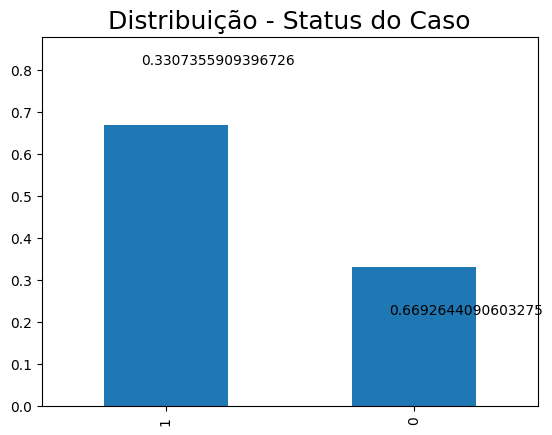

In [27]:
_ = train_df.status_do_caso.value_counts(1).plot.bar()
_ = plt.title('Distribuição - Status do Caso', size = 18)
_ = plt.text(-0.1, 0.815, train_df.status_do_caso.value_counts(1)[0])
_ = plt.text(0.9, 0.22, train_df.status_do_caso.value_counts(1)[1])
_ = plt.ylim(0, 0.88)

<ipython-input-28-89ceb2847431>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)


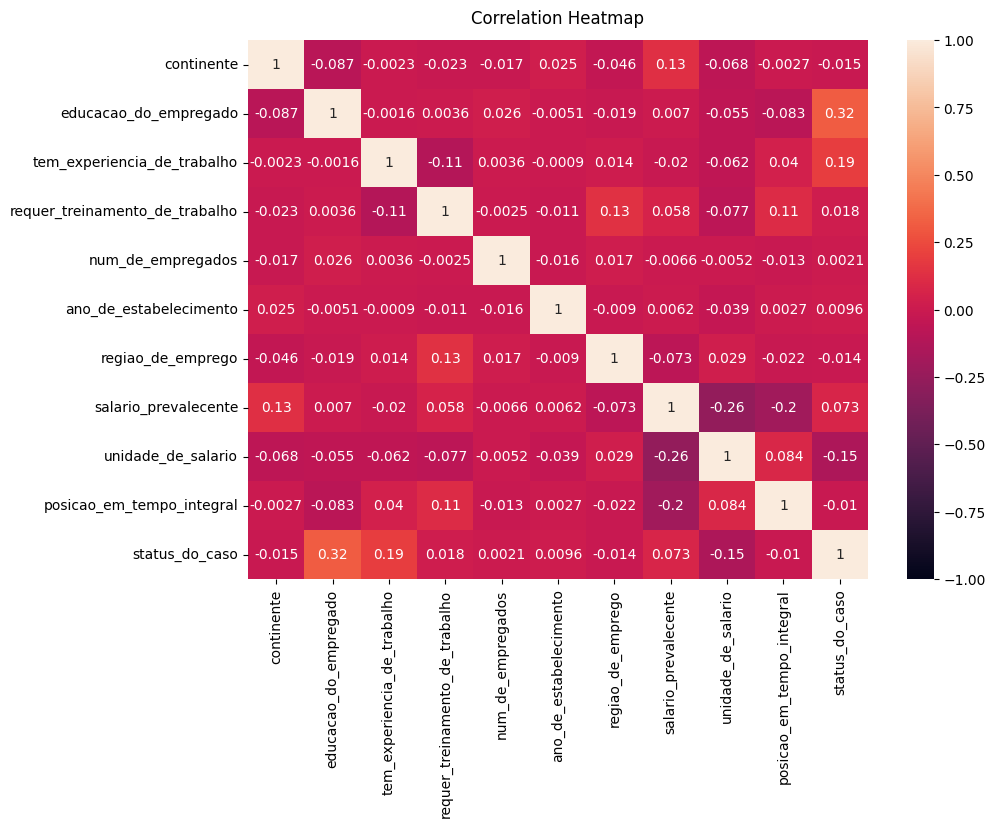

In [28]:
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Não há nenhuma variável com correlação alta com a variável alvo.

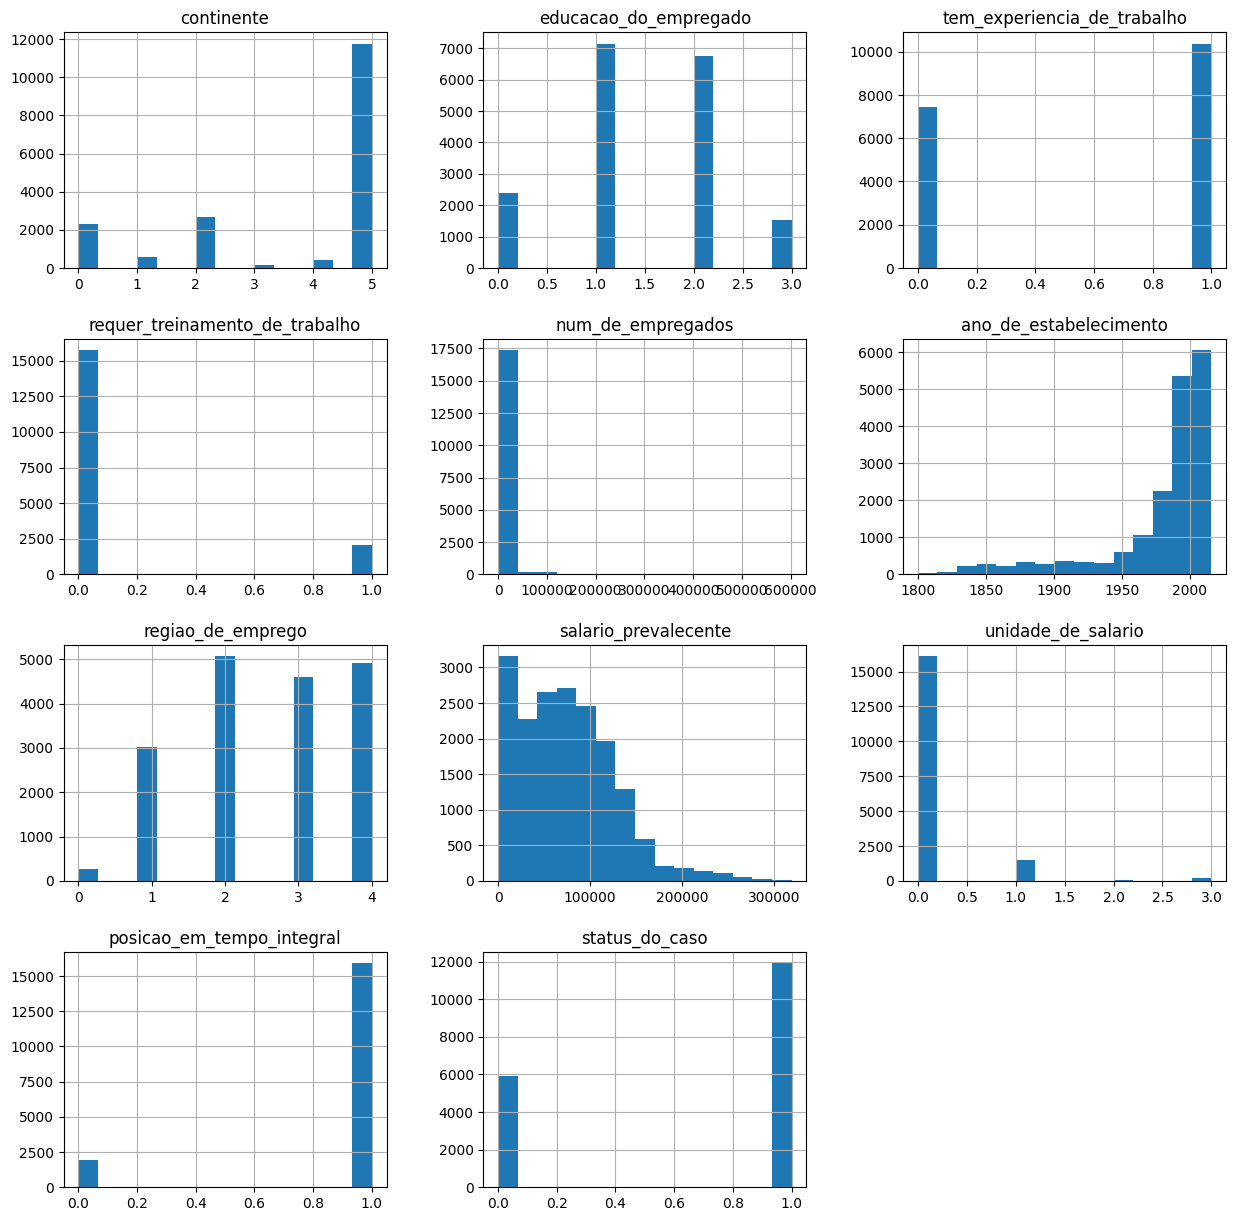

In [29]:
# Contrução dos histogramas das variáveis do dataset.

train_df.hist(bins=15, figsize=(15,15));

Text(0.5, 1.0, 'Feature Importance')

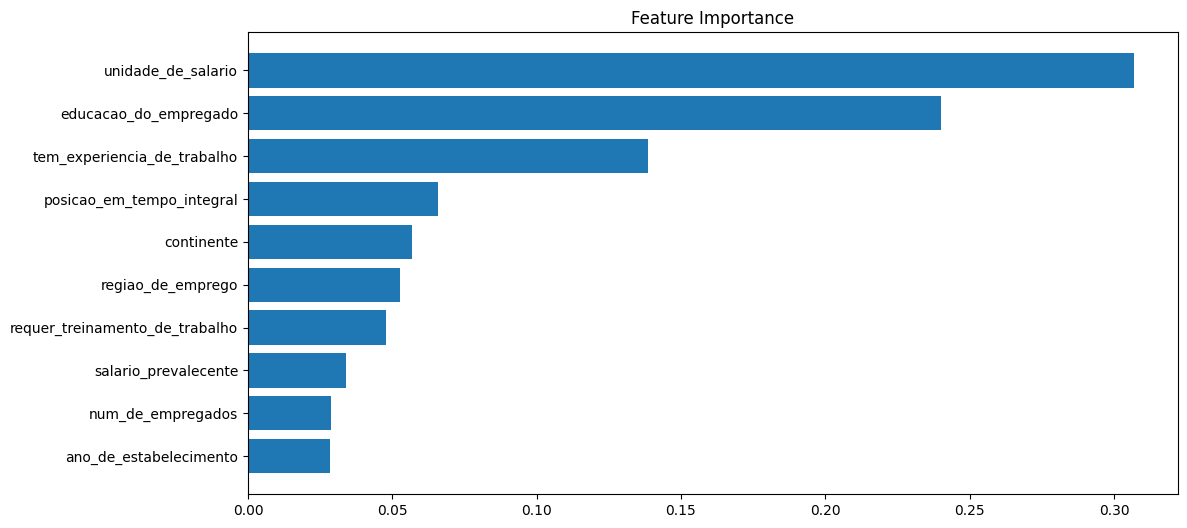

In [30]:
# Visualizando importância de cada uma das variáveis
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance')


#### Retreinando modelo - Otimizando hiperparâmetros
Grid search, random search e Bayesian optimization são técnicas de ajustes de hiperparâmetros.

* **Grid Search**: É o jeito mais exaustivo de procurar hiperparâmetros. Ele evalue cada combinação possível para o modelo, sendo assim, se houver muitas combinações, ele vai demorar muito tempo para rodar.

* **Random Search**: Essa técnica procura um número fixos de combinações aleatóriamente, então, nem todas as combinações são realizadas. Portanto, uma gama mais abrangente de valores e uma lista mais longa de hiperparâmetros podem ser avaliadas dentro de um determinado tempo. A desvantagem é que às vezes a seleção aleatória pode não incluir combinações de hiperparâmetros de alto desempenho.

* **Bayesian optimization**: Utiliza os resultados da etapa anterior para decidir qual combinação de hiperparâmetros será avaliada a seguir. A principal diferença entre a otimização bayesiana e a pesquisa em grade/aleatória é que a pesquisa em grade e a pesquisa aleatória consideram cada combinação de hiperparâmetros independentemente, enquanto a otimização bayesiana depende dos resultados da avaliação anterior.

In [33]:
# Tunando hiperparâmetros
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval

In [41]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import f1_score

In [31]:
X = train_df.drop(["status_do_caso", "id_do_caso"], axis=1)
y = train_df["status_do_caso"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

A padronização consiste em redimensionar os recursos para a mesma escala. É calculado extraindo a média e dividindo pelo desvio padrão. Após a padronização, cada característica tem média zero e desvio padrão unitário.

In [35]:
# Inicializando padronização
sc = StandardScaler()
# Padronizando os dados de treinamento
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train),index=X_train.index, columns=X_train.columns)
# Padronizando os dados de teste
X_test_transformed = pd.DataFrame(sc.transform(X_test),index=X_test.index, columns=X_test.columns)
# Resumo estatístico depois da padronização
X_train_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
continente,14268.0,8.266757e-17,1.000035,-1.989065,-0.925926,0.668784,0.668784,0.668784
educacao_do_empregado,14268.0,-2.216089e-17,1.000035,-1.720689,-0.505965,-0.505965,0.708759,1.923484
tem_experiencia_de_trabalho,14268.0,-1.827651e-16,1.000035,-1.181682,-1.181682,0.846251,0.846251,0.846251
requer_treinamento_de_trabalho,14268.0,-3.461082e-17,1.000035,-0.363842,-0.363842,-0.363842,-0.363842,2.748446
num_de_empregados,14268.0,-1.593592e-17,1.000035,-0.244639,-0.198779,-0.151208,-0.091672,25.853578
ano_de_estabelecimento,14268.0,-1.214118e-15,1.000035,-4.275233,-0.085879,0.413988,0.604413,0.866247
regiao_de_emprego,14268.0,2.091589e-17,1.000035,-2.369955,-0.553289,0.355044,1.263378,1.263378
salario_prevalecente,14268.0,-3.286783e-17,1.000035,-1.406325,-0.765345,-0.084232,0.627476,4.620184
unidade_de_salario,14268.0,-4.581576e-17,1.000035,-0.289738,-0.289738,-0.289738,-0.289738,6.740835
posicao_em_tempo_integral,14268.0,2.091589e-17,1.000035,-2.875927,0.347714,0.347714,0.347714,0.347714


In [36]:
# Resumo estatístico antes da padronização
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
continente,14268.0,3.741870,1.881286,0.0000,2.0000,5.000,5.0000,5.00
educacao_do_empregado,14268.0,1.416526,0.823261,0.0000,1.0000,1.000,2.0000,3.00
tem_experiencia_de_trabalho,14268.0,0.582703,0.493130,0.0000,0.0000,1.000,1.0000,1.00
requer_treinamento_de_trabalho,14268.0,0.116905,0.321318,0.0000,0.0000,0.000,0.0000,1.00
num_de_empregados,14268.0,5617.910008,23071.158340,-26.0000,1032.0000,2129.500,3503.0000,602069.00
ano_de_estabelecimento,14268.0,1979.607864,42.012722,1800.0000,1976.0000,1997.000,2005.0000,2016.00
regiao_de_emprego,14268.0,2.609125,1.100956,0.0000,2.0000,3.000,4.0000,4.00
salario_prevalecente,14268.0,74491.406792,52969.193994,2.1367,33953.1275,70029.885,107727.1475,319210.27
unidade_de_salario,14268.0,0.123633,0.426723,0.0000,0.0000,0.000,0.0000,3.00
posicao_em_tempo_integral,14268.0,0.892136,0.310219,0.0000,1.0000,1.000,1.0000,1.00


In [37]:
# Inicializando o modelo
model2 = XGBClassifier()

# Vendo configurações padrões
model2.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [38]:
# Treina o modelo
model2 = XGBClassifier(seed=0).fit(X_train_transformed,y_train)
# Faz a previsão
model2_predict = model2.predict(X_test_transformed)
# Obtem a porcentagem da previsão
model2_predict_prob = model2.predict_proba(X_test)[:,1]

In [40]:
# métricas da performance
precision, recall, fscore, support = score(y_test, model2_predict)
# printa resultado
print(f'The recall value for the baseline xgboost model is {recall[1]:.4f}')

The recall value for the baseline xgboost model is 0.8425


In [42]:
f1 = f1_score(y_test, model2_predict)

print('F1 score:', f1)

F1 score: 0.8083844176389164


Não houve ajuste de hiperparâmetro mas o f1 score foi de 0.73 para 0.80 com a padronização.

Mas, Mario "Kazanova", um dos melhores competidores do Kaggle, cita considerar tudo como hiperparâmetro. Exemplo: scaling, as transformações das variáveis e até os métodos de seleção de variáveis.

**Grid Search para XGBoost**

In [44]:
# Definindo espaço para procura
param_grid = {
    # Porcentagem de colunas que serão amostras aleatórias para cada árvore
    "colsample_bytree": [ 0.3, 0.5 , 0.8 ],
    # reg_alpha fornece regularização l1 para o peso, valores mais altos resultam em modelos mais conservadores
    "reg_alpha": [0, 0.5, 1, 5],
    # reg_lambda fornece regularização l2 para o peso, valores mais altos resultam em modelos mais conservadores
    "reg_lambda": [0, 0.5, 1, 5]
    }
# score
scoring = ['recall']
# k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [45]:
# Definindo grid search
grid_search = GridSearchCV(estimator=model2,
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='recall',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train_transformed, y_train)
# resultado
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.8],
                         'reg_alpha': [0, 0.5, 1, 5],
                         'reg_lambda': [0, 0.5, 1, 5]},
             refit='recall', scoring=['recall'])

In [46]:
# a melhor pontuação e os hiperparâmetros correspondentes
print(f'The best score is {grid_result.best_score_:.4f}')
print('The best score standard deviation is', round(grid_result.cv_results_['std_test_recall'][grid_result.best_index_], 4))
print(f'The best hyperparameters are {grid_result.best_params_}')

The best score is 0.8707
The best score standard deviation is 0.007
The best hyperparameters are {'colsample_bytree': 0.3, 'reg_alpha': 5, 'reg_lambda': 1}


In [49]:
# Fazendo previsão usando o melhor modelo
grid_predict = grid_search.predict(X_test_transformed)
# obtendo probabilidade
grid_predict_prob = grid_search.predict_proba(X_test_transformed)[:,1]
# métricas de performance
precision, recall, fscore, support = score(y_test, grid_predict)
# resultado
print(f'The recall value for the xgboost grid search is {recall[1]:.4f}')

The recall value for the xgboost grid search is 0.8537


In [50]:
f1 = f1_score(y_test, grid_predict)

print('F1 score:', f1)

F1 score: 0.8145526057030482


Após usarmos Grid Search, o f1 score foi de 0.80 a 0.81, pouco improviso mas é algo.

**Random Search para XGBoost**

In [51]:
# definindo espaço de procura
param_grid = {
    # A taxa de aprendizagem reduz os pesos para tornar o processo de impulso mais conservador
    "learning_rate": [0.0001,0.001, 0.01, 0.1, 1] ,
    # Profundidade máxima da árvore, aumentá-la aumenta a complexidade do modelo.
    "max_depth": range(3,21,3),
    # Gamma especifica a redução mínima de perdas necessária para fazer uma divisão.
    "gamma": [i/10.0 for i in range(0,5)],
    # Porcentagem de colunas que serão amostras aleatórias para cada árvore.
    "colsample_bytree": [i/10.0 for i in range(3,10)],
    # reg_alpha fornece regularização l1 para o peso, valores mais altos resultam em modelos mais conservadores
    "reg_alpha": [1e-5, 1e-2, 0.1, 1, 10, 100],
    # reg_lambda fornece regularização l2 para o peso, valores mais altos resultam em modelos mais conservadores
    "reg_lambda": [1e-5, 1e-2, 0.1, 1, 10, 100]}
# score
scoring = ['recall']
# k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

A mesma métrica de pontuação e valores de validação cruzada usados ​​na pesquisa em grade são usados ​​para a pesquisa aleatória. Mas para uma pesquisa aleatória, precisamos especificar um valor para n_iter, o número de combinações de parâmetros amostradas. Portanto, estamos testando aleatoriamente 48 combinações para este exemplo.

In [52]:
# Definindo random search
random_search = RandomizedSearchCV(estimator=model2,
                           param_distributions=param_grid,
                           n_iter=48,
                           scoring=scoring,
                           refit='recall',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=0)
# Fit grid search
random_result = random_search.fit(X_train_transformed, y_train)

random_result

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importanc...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=48, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7, 0.8, 0.9],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.1, 1],
                                        'max_depth': range(3, 21, 3),
                                        'reg_alpha': [1e-05, 0.01, 0.1, 1, 10,
                                                      100],
                                        'reg_lambda': [1e-05, 0.01, 0.1, 1, 10,
                                                       100]},
                   refit='recall', scoring=['recall'])

In [53]:
# a melhor pontuação e os hiperparâmetros correspondentes
print(f'The best score is {random_result.best_score_:.4f}')
print('The best score standard deviation is', round(random_result.cv_results_['std_test_recall'][random_result.best_index_], 4))
print(f'The best hyperparameters are {random_result.best_params_}')

The best score is 1.0000
The best score standard deviation is 0.0
The best hyperparameters are {'reg_lambda': 1e-05, 'reg_alpha': 0.01, 'max_depth': 18, 'learning_rate': 0.001, 'gamma': 0.3, 'colsample_bytree': 0.9}


In [54]:
# Fazendo previsão usando o melhor modelo
random_predict = random_search.predict(X_test_transformed)
# obtendo probabilidade
random_predict_prob = random_search.predict_proba(X_test_transformed)[:,1]
# métricas de performance
precision, recall, fscore, support = score(y_test, random_predict)
# resultado
print(f'The recall value for the xgboost random search is {recall[1]:.4f}')

The recall value for the xgboost random search is 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
f1 = f1_score(y_test, random_predict)

print('F1 score:', f1)

F1 score: 0.8094761428094761


**Bayesian Optimization para XGBoost**

In [58]:
# espaço
space = {
    'learning_rate': hp.choice('learning_rate', [0.0001,0.001, 0.01, 0.1, 1]),
    'max_depth' : hp.choice('max_depth', range(3,21,3)),
    'gamma' : hp.choice('gamma', [i/10.0 for i in range(0,5)]),
    'colsample_bytree' : hp.choice('colsample_bytree', [i/10.0 for i in range(3,10)]),
    'reg_alpha' : hp.choice('reg_alpha', [1e-5, 1e-2, 0.1, 1, 10, 100]),
    'reg_lambda' : hp.choice('reg_lambda', [1e-5, 1e-2, 0.1, 1, 10, 100])
}

In [59]:
# k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [60]:
# função objetiva
def objective(params):

    model2 = XGBClassifier(seed=0, **params)
    score = cross_val_score(estimator=model2,
                            X=X_train_transformed,
                            y=y_train,
                            cv=kfold,
                            scoring='recall',
                            n_jobs=-1).mean()
    # Loss é o score negativo
    loss = - score
    # dicionário com informações para evaluação
    return {'loss': loss, 'params': params, 'status': STATUS_OK}

In [61]:
# otimize
best = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 48, trials = Trials())

100%|██████████| 48/48 [01:07<00:00,  1.41s/trial, best loss: -1.0]


In [62]:
# melhores parâmetros
print(best)
# valores dos melhores parâmetros
print(space_eval(space, best))

{'colsample_bytree': 2, 'gamma': 1, 'learning_rate': 0, 'max_depth': 1, 'reg_alpha': 3, 'reg_lambda': 3}
{'colsample_bytree': 0.5, 'gamma': 0.1, 'learning_rate': 0.0001, 'max_depth': 6, 'reg_alpha': 1, 'reg_lambda': 1}


In [63]:
# Treinando modelo com os melhores parâmetros
model_bm = XGBClassifier(seed=0,
                           colsample_bytree=space_eval(space, best)['colsample_bytree'],
                           gamma=space_eval(space, best)['gamma'],
                           learning_rate=space_eval(space, best)['learning_rate'],
                           max_depth=space_eval(space, best)['max_depth'],
                           reg_alpha=space_eval(space, best)['reg_alpha'],
                           reg_lambda=space_eval(space, best)['reg_lambda']
                           ).fit(X_train_transformed,y_train)
# Make prediction using the best model
bayesian_opt_predict = model_bm.predict(X_test_transformed)
# Get predicted probabilities
bayesian_opt_predict_prob = model_bm.predict_proba(X_test_transformed)[:,1]
# Get performance metrics
precision, recall, fscore, support = score(y_test, bayesian_opt_predict)
# Print result
print(f'The recall value for the xgboost Bayesian optimization is {recall[1]:.4f}')

The recall value for the xgboost Bayesian optimization is 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Conclusões**

Random Search e Bayesian optimization tiveram o maior valor para recall, mas não tiveram o melhor f1-score.

**f1-score:** A pontuação F1 varia de 0 a 1, com pontuação 1 indicando precisão e evocação perfeitas e 0 indicando desempenho ruim. Uma pontuação F1 alta significa que o modelo possui alta precisão e alto recall, o que indica que é um bom modelo para a tarefa de classificação binária.

### **Implementação:**

Dependendo dos requisitos, a fase de implantação pode ser tão simples quanto gerar um relatório ou tão complexa quanto implementar um processo de mineração de dados repetível em toda a empresa.”

–Guia CRISP-DM

Um modelo não é particularmente útil a menos que o cliente possa acessar seus resultados. A complexidade desta fase varia amplamente. Esta fase final tem quatro tarefas:

Planejar implantação: Desenvolva e documente um plano para implantação do modelo.
Planeje monitoramento e manutenção: Desenvolva um plano completo de monitoramento e manutenção para evitar problemas durante a fase operacional (ou fase pós-projeto) de um modelo.
Produzir relatório final: A equipe do projeto documenta um resumo do projeto que pode incluir uma apresentação final dos resultados da mineração de dados.
Revise o projeto: conduza uma retrospectiva do projeto sobre o que deu certo, o que poderia ter sido melhor e como melhorar no futuro.